In [1]:
%reload_ext nb_black

import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

%matplotlib inline
import os

print(os.getcwd())

print(os.listdir(os.getcwd()))

C:\Users\jlim7\OneDrive\Documents\GitHub\Capstone1_Rename_later
['.git', '.gitignore', '.ipynb_checkpoints', '769175_1325857_bundle_archive.zip', 'Data Analysis.ipynb', 'Initial EDA.ipynb', 'modern-renewable-energy-consumption.csv', 'README.md', 'Research Proposal.ipynb']


<IPython.core.display.Javascript object>

In [60]:
energy = pd.read_csv("modern-renewable-energy-consumption.csv")
energy.head()

,Entity,Code,Year,Hydropower (terawatt-hours),Solar (terawatt-hours),Wind (terawatt-hours),Other renewables (terawatt-hours)
0,Africa,NaN,1965,14.278806,0.0,0.0,0.0
1,Africa,NaN,1966,15.649049,0.0,0.0,0.0
2,Africa,NaN,1967,16.158333,0.0,0.0,0.0
3,Africa,NaN,1968,18.622983,0.0,0.0,0.0
4,Africa,NaN,1969,21.582897,0.0,0.0,0.0


<IPython.core.display.Javascript object>

From the website: https://www.statista.com/statistics/263455/primary-energy-consumption-of-selected-countries/
We see that the top three energy consuming countries in 2019 (most to least) are China, the United States, and India.

In [52]:
# To clean up the data, I have filtered out the table to only include the top three energy consuming countries.
top = ["United States", "China", "India"]
top_energy = energy[energy["Entity"].isin(top)]
us = energy[energy["Entity"] == "United States"]
china = energy[energy["Entity"] == "China"]
india = energy[energy["Entity"] == "India"]
top_energy.head()

,Entity,Code,Year,Hydropower (terawatt-hours),Solar (terawatt-hours),Wind (terawatt-hours),Other renewables (terawatt-hours)
824,China,CHN,1965,22.097000,0.0,0.0,0.0
825,China,CHN,1966,22.485907,0.0,0.0,0.0
826,China,CHN,1967,19.383488,0.0,0.0,0.0
827,China,CHN,1968,22.870395,0.0,0.0,0.0
828,China,CHN,1969,23.259302,0.0,0.0,0.0


<IPython.core.display.Javascript object>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001234C81B288>,
      dtype=object)

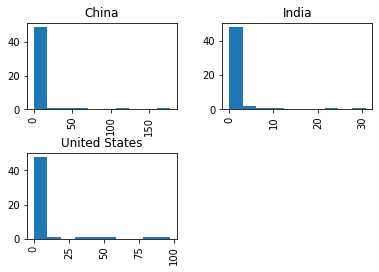

<IPython.core.display.Javascript object>

In [40]:
#To check for normality between the three variables I have plotted histograms for each country and the solar energy produced.
top_energy["Solar (terawatt-hours)"].hist(by=top_energy["Entity"])

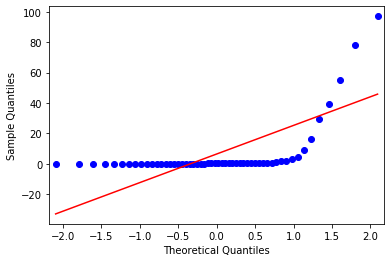

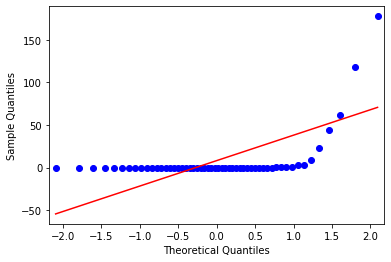

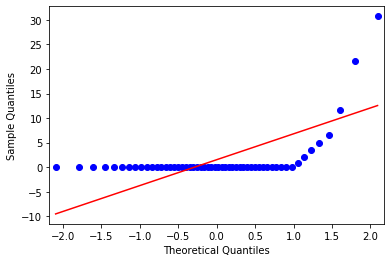

<IPython.core.display.Javascript object>

In [70]:
qqplot(us["Solar (terawatt-hours)"], line="s")
qqplot(china["Solar (terawatt-hours)"], line="s")
qqplot(india["Solar (terawatt-hours)"], line="s")
plt.show()

In [42]:
# From the histograms and qqplots above I noticed the data is not normalized.
# Additionally, each of the countries are independent of eachother.
# Therefore, to check if there is a siginificant difference between the three I used a Kruskal Wallice test.
t, p = stats.kruskal(
    top_energy.loc[top_energy["Entity"] == "United States", ["Solar (terawatt-hours)"]],
    top_energy.loc[top_energy["Entity"] == "China", ["Solar (terawatt-hours)"]],
    top_energy.loc[top_energy["Entity"] == "India", ["Solar (terawatt-hours)"]],
)
if p < 0.05:
    print("There is a significant difference. Reject the null hypothesis")
else:
    print("There is no significant difference. Cannot reject the null hypothesis")
print(p)

There is a significant difference. Reject the null hypothesis
0.006402094683951255


<IPython.core.display.Javascript object>

In [73]:
# Posthoc follow up tests with mannwhitneyu shows we are able to reject the null hypothesis and state there is a significant
# difference in the solar production between the U.S and China, and the U.S and India.
# However, we are not able to reject the null hypothesis for China and India.
_, p1 = stats.mannwhitneyu(
    us["Solar (terawatt-hours)"], china["Solar (terawatt-hours)"]
)
_, p2 = stats.mannwhitneyu(
    us["Solar (terawatt-hours)"], india["Solar (terawatt-hours)"]
)
_, p3 = stats.mannwhitneyu(
    china["Solar (terawatt-hours)"], india["Solar (terawatt-hours)"]
)

p_values = [p1, p2, p3]
reject, corr_p, sidak, bonf = multipletests(p_values, alpha=0.05)
print(p_values)
print(reject)

[0.012935468271930638, 0.001493744735485237, 0.1375139249718007]
[ True  True False]


<IPython.core.display.Javascript object>

In [63]:
# Function to determine common language effect size
def cles_ind(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)

    diff = x1[:, None] - x2
    cles = max((diff < 0).sum(), (diff > 0).sum()) / diff.size

    return cles

<IPython.core.display.Javascript object>

In [43]:
# Next I created different variables to make calculating the confidence interval easier.
x1 = us["Solar (terawatt-hours)"]
x2 = china["Solar (terawatt-hours)"]
x3 = india["Solar (terawatt-hours)"]

<IPython.core.display.Javascript object>

In [64]:
#If a random value was picked from the U.S solar production and a random value was picked
#from the China solar production, there is a 54.32% chance the U.S solar production is greater.
cles_ind(x1, x2)

0.5432098765432098

<IPython.core.display.Javascript object>

In [65]:
#If a random value was picked from the U.S solar production and a random value was picked
#from the India solar production, there is a 56.58% chance the U.S solar production is greater.
cles_ind(x1, x3)

0.565843621399177

<IPython.core.display.Javascript object>

In [66]:
#If a random value was picked from the China solar production and a random value was picked
#from the India solar production, there is a 42.83% chance the China solar production is greater.
cles_ind(x2, x3)

0.4283264746227709

<IPython.core.display.Javascript object>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001234CAE5848>,
      dtype=object)

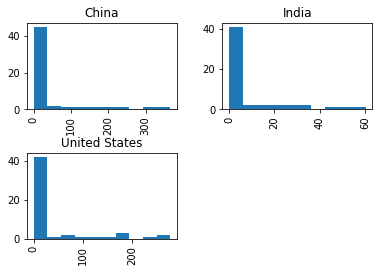

<IPython.core.display.Javascript object>

In [48]:
# Like above, I have plotted histograms for each country and the wind energy produced to check for normality.
top_energy["Wind (terawatt-hours)"].hist(by=top_energy["Entity"])

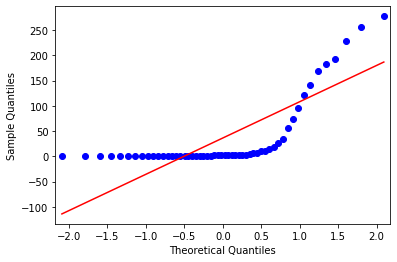

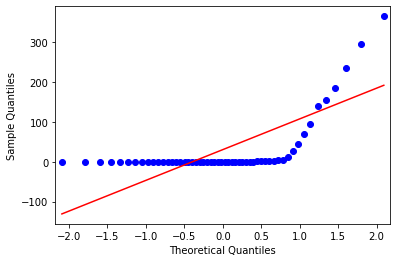

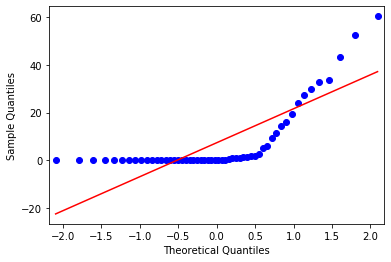

<IPython.core.display.Javascript object>

In [71]:
qqplot(us["Wind (terawatt-hours)"], line="s")
qqplot(china["Wind (terawatt-hours)"], line="s")
qqplot(india["Wind (terawatt-hours)"], line="s")
plt.show()

In [50]:
# Once again from the histograms and qqplots above I noticed the data is not normalized.
# We know each of the countries are independent of eachother.
# So we stick with the Kruskal Wallice test.
t, p = stats.kruskal(
    top_energy.loc[top_energy["Entity"] == "United States", ["Wind (terawatt-hours)"]],
    top_energy.loc[top_energy["Entity"] == "China", ["Wind (terawatt-hours)"]],
    top_energy.loc[top_energy["Entity"] == "India", ["Wind (terawatt-hours)"]],
)
if p < 0.05:
    print("There is a significant difference. Reject the null hypothesis")
else:
    print("There is no significant difference. Cannot reject the null hypothesis")
print(p)

There is no significant difference. Cannot reject the null hypothesis
0.12251965106037972


<IPython.core.display.Javascript object>

In [74]:
# Posthoc follow up tests with mannwhitneyu shows we are not able to reject the null hypothesis for any of the countries.
# There is no significant difference between wind energy production in the U.S, China, and India.
_, p1 = stats.mannwhitneyu(us["Wind (terawatt-hours)"], china["Wind (terawatt-hours)"])
_, p2 = stats.mannwhitneyu(us["Wind (terawatt-hours)"], india["Wind (terawatt-hours)"])
_, p3 = stats.mannwhitneyu(
    china["Wind (terawatt-hours)"], india["Wind (terawatt-hours)"]
)

p_values = [p1, p2, p3]
reject, corr_p, sidak, bonf = multipletests(p_values, alpha=0.05)
print(p_values)
print(reject)

[0.04595743267799342, 0.03352119293398198, 0.47934734052822003]
[False False False]


<IPython.core.display.Javascript object>

# Conclusion
From the visualized data, I have concluded solar and wind production are not normally distributed and are both independent variables. Therefore, I conducted Kruskal Wallice tests for each variable and had follow up tests with mannwhitneyu tests. The solar energy production Kruskal Wallice test resulted in a calculated p-value of 0.0064. This led to a the mannwhitneyu follow up test which gave p-values of 0.0129, 0.0015, and 0.1375 when comparing the U.S to China, the U.S to India, and China to India respectively. With the calculated p-values, I am able to reject part of the null hypothesis and state that there is a significant difference in the solar energy production between the U.S and China and the U.S and India, but not between China and India. As for wind production, the Kruskal Wallice calculated p-value of 0.1225 indicates that there is not a significant difference in the production of wind energy between the United States, China, and India. This is further proved by obtaining mannwhitneyu calculated p-values of 0.0460, 0.0335, and 0.4793. Thus, we are not able to reject the null hypothesis. 

Using the common language effect size indicator function, I learned that if a random value were to be picked from the U.S solar production and a random value were to be picked from the China solar production, there is a 54.32% chance the U.S solar production is greater than the China solar production. It was also used to determine if a random value was picked from the U.S solar production and a random value was picked from the India solar production, there is a 56.58% chance the U.S solar production is greater.
